# 4.10 Coding Etiquette & Excel Reporting

In [1]:
# Install data libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Import data sets

In [2]:
path = r'C:\Users\julia\anaconda3\Instacart Basket Analysis'

In [5]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data.pkl'))

## 2. Security implications

In [9]:
df_merged.head(1)

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,2423,Scott,Webster,Male,New Mexico,40,1/6/2017,3,married,52958,...,Low-range product,Regularly busy,Busiest days,Most orders,7,New customer,7.404762,Low spender,11.0,Regular customer


There are columns that refer to client first and surnames, as well as gender, state, age, family status and number of dependants. These columns are personally identifiable information (PII).

In [15]:
# Dropping personal information
df_merged.drop(columns=['First Name','Surname'], inplace= True)

In [16]:
df_merged.head(1)

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,2423,Male,New Mexico,40,1/6/2017,3,married,52958,6489,6489,...,Low-range product,Regularly busy,Busiest days,Most orders,7,New customer,7.404762,Low spender,11.0,Regular customer


The data is now unpersonalised and therefore secure.

## 3. Customer behavior in different geographic areas

In [18]:
# Creating a region column and grouping states Northeast
df_merged.loc[df_merged['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'

In [19]:
# Creating a region column and grouping states Midwest
df_merged.loc[df_merged['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'

In [20]:
# Creating a region column and grouping states South
df_merged.loc[df_merged['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'

In [21]:
# Creating a region column and grouping states Mountain
df_merged.loc[df_merged['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'Mountain'

In [23]:
# Checking if all columns have been attributed a value
df_merged['region'].value_counts(dropna= False)

region
South        1273
Midwest       929
Northeast     804
Mountain      800
Name: count, dtype: int64

In [31]:
# Determining whether there is a difference in spending habits
df_avg_spend = df_merged.groupby(['order_frequency'])['mean_product_price'].mean()

In [34]:
df_avg_spend.drop(index='nan',inplace=True)

Text(0, 0.5, 'Avg per item')

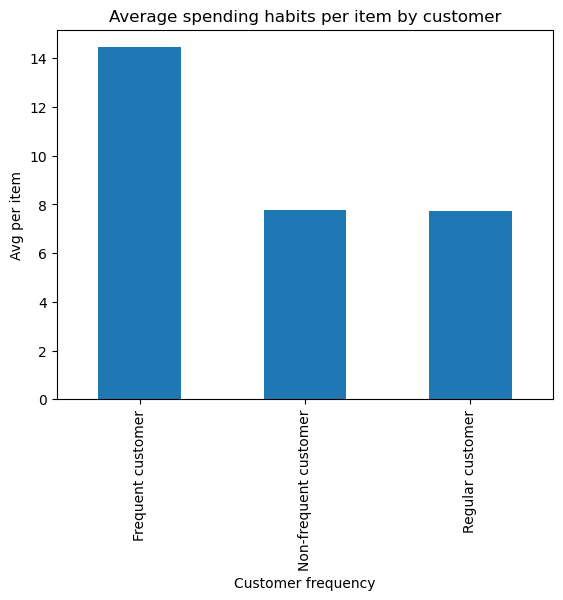

In [37]:
bar_avg_spend = df_avg_spend.plot.bar()
plt.title('Average spending habits per item by customer')
plt.xlabel('Customer frequency')
plt.ylabel('Avg per item')

In [40]:
# Determining whether there is a difference in spending habits between different regions
df_spend_region = df_merged.groupby(['region'])['mean_product_price'].mean()
df_spend_region.reset_index()

,region,mean_product_price
0,Midwest,24.019268
1,Mountain,7.719750
2,Northeast,7.623881
3,South,7.728044


Text(0.5, 0, 'Region')

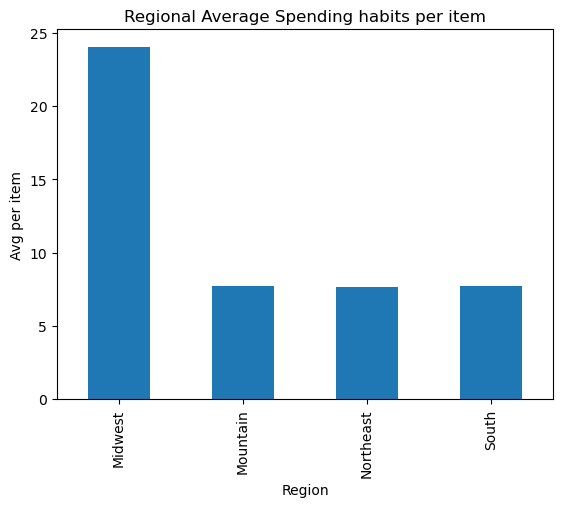

In [41]:
bar_spend_region = df_spend_region.plot.bar(ylabel='avg.spend')
plt.title('Regional Average Spending habits per item')
plt.ylabel('Avg per item')
plt.xlabel('Region')

In [99]:
# Export the visualizations
bar_spend_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spend_region.png'))

In [43]:
bar_avg_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_avg_spend.png'))

# 4. Exclude low-activity customers

In [44]:
# creating exclusion flag column
df_merged.loc[df_merged['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
df_merged.loc[df_merged['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [45]:
df_merged['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    3049
Excluded         757
Name: count, dtype: int64

In [46]:
# Create data frame with only the excluded data
df_merged_excluded = df_merged[df_merged['exclusion_flag']=='Excluded']

In [47]:
# Create data frame with only the not-excluded data
df_merged_not_excluded =  df_merged[df_merged['exclusion_flag']=='Not Excluded']

In [48]:
len(df_merged_excluded) + len (df_merged_not_excluded) == len(df_merged)

True

In [49]:
# Export new data frame
df_merged_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_not_excluded'))

# 5. Customer profiling

In [50]:
# Creating income categories
df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'
df_merged_not_excluded.loc[(df_merged_not_excluded['income'] >= 50000) & (df_merged_not_excluded['income']< 100000),'income_type'] = 'Middle'
df_merged_not_excluded.loc[df_merged_not_excluded['income']>= 100000,'income_type'] = 'High'

C:\Users\julia\AppData\Local\Temp\ipykernel_36256\2697743029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'


In [53]:
# Creating age categories
df_merged_not_excluded.loc[df_merged_not_excluded['Age']< 40,'age_type'] = 'Young Adult'
df_merged_not_excluded.loc[(df_merged_not_excluded['Age'] >= 40) & (df_merged_not_excluded['Age']< 65),'age_type'] = 'Middle Aged'
df_merged_not_excluded.loc[df_merged_not_excluded['Age']>= 65,'age_type'] = 'Senior'

In [55]:
# Creating n_dependants categories
df_merged_not_excluded['dependant_type'] = 'No Dependants'
df_merged_not_excluded.loc[df_merged_not_excluded['n_dependants']> 0,'dependant_type'] = 'Has Dependants'

C:\Users\julia\AppData\Local\Temp\ipykernel_36256\2365163431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded['dependant_type'] = 'No Dependants'


## 6. Visualizations

(-1.0999993360290108,
 1.0999999683823338,
 -1.0999997564115975,
 1.0999999528417266)

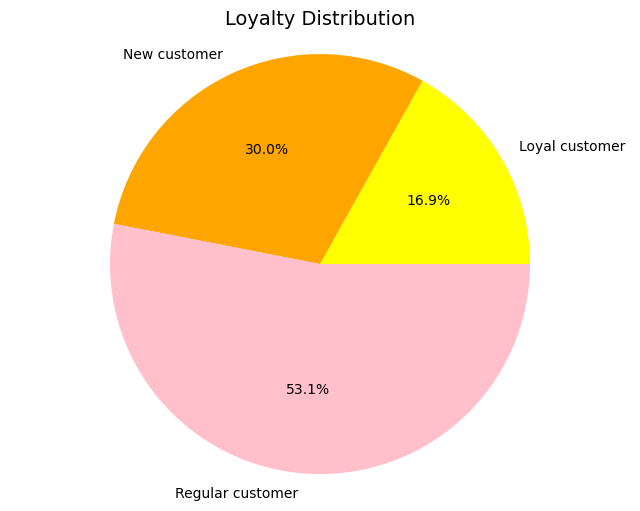

In [64]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (df_merged_not_excluded['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_pie = plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['yellow', 'orange', 'pink'])
plt.title('Loyalty Distribution', fontsize=14)
plt.axis('equal')

In [100]:
# Export the pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

<Figure size 640x480 with 0 Axes>

## 7. Aggregate the max, mean, and min variables on a customer-profile level

In [67]:
df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)

C:\Users\julia\AppData\Local\Temp\ipykernel_36256\1705628768.py:1: FutureWarning: The provided callable <function sum at 0x000002C494ED4CC0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)
C:\Users\julia\AppData\Local\Temp\ipykernel_36256\1705628768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)


In [71]:
total_expenditure

NameError: name 'total_expenditure' is not defined

In [68]:
df_merged_not_excluded.groupby('loyalty_flag').agg({'total_expenditure': ['mean', 'min', 'max'], 'max_number': ['mean', 'min', 'max']})

total_expenditure               order_number        
                              mean  min      max         mean min max
loyalty_flag                                                         
Loyal customer          288.652621  6.8    854.3    52.466019  23  92
New customer            133.792576  1.4    340.7     6.943231   1  10
Regular customer        301.702658  1.2  15024.5    21.509271   1  40

In [72]:
df_merged_not_excluded.groupby('income_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure               order_number        
                         mean  min      max         mean min max
income_type                                                     
High               322.195483  1.4  15024.5    19.255989   1  84
Low                363.536855  1.2    854.3    29.149877   2  82
Middle             119.117612  2.4    306.6    23.865368   2  92

In [73]:
df_merged_not_excluded.groupby('region').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure               order_number        
                       mean  min      max         mean min max
region                                                        
Midwest          517.093054  1.4  15024.5    21.463097   2  82
Mountain         127.259969  4.4    293.3    21.904239   1  70
Northeast        281.968142  1.9    854.3    24.721239   5  92
South            124.462800  1.2    340.7    21.703739   1  84

In [74]:
df_merged_not_excluded.groupby('dependant_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure               order_number        
                            mean  min      max         mean min max
dependant_type                                                     
Has Dependants        281.865391  1.4  15024.5    22.961299   1  84
No Dependants         156.968290  1.2    447.5    20.680400   1  92

## 8. Compare customer profiles with regions and departments

C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Count')

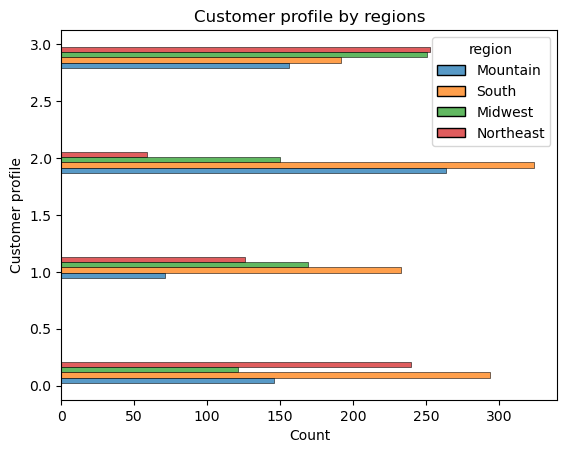

In [90]:
# Plotting histogram of customer type by region
sns.histplot(data=df_merged_not_excluded,y='n_dependants',hue='region',multiple='dodge',shrink=.8)
plt.title('Customer profile by regions')
plt.ylabel('Customer profile')
plt.xlabel('Count')

In [91]:
# Export histogram
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Customer_profile_by_region_bar.png'))

<Figure size 640x480 with 0 Axes>

C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Count')

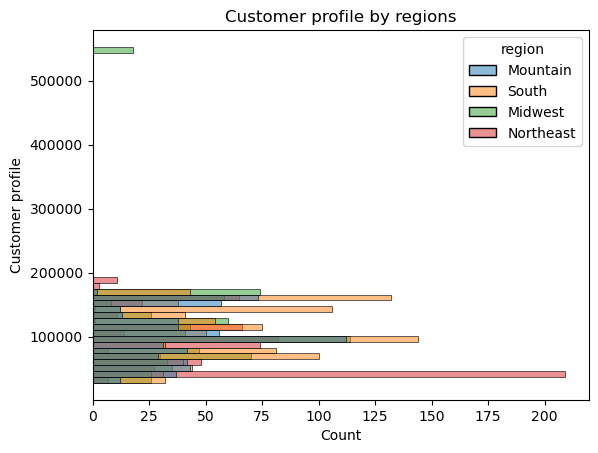

In [95]:
# Plotting histogram of customer type by region
sns.histplot(data=df_merged_not_excluded,y='income',hue='region')
plt.title('Customer profile by regions')
plt.ylabel('Customer profile')
plt.xlabel('Count')

In [96]:
# Export histogram
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Customer_profile_income_by_region_bar.png'))

<Figure size 640x480 with 0 Axes>

## 9. Export

In [97]:
df_merged_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','4_10_final_data'))